# Задачи

1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот.

4. Визуализируйте продажи по дням.

5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

---

In [51]:
# 1
import pandas as pd
import os

In [52]:
path = '/home/savely/kc/python/lesson_4/data/'

In [53]:
df = pd.DataFrame()

for cur_path, dirs, files in os.walk(path):
    for file in files:
        data_path = f'{cur_path}/{file}'

        temp_df = pd.read_csv(data_path)

        path_parts = cur_path.split('/')
        date = path_parts[-2]
        name = path_parts[-1]

        temp_df['date'] = date
        temp_df['name'] = name

        df = pd.concat((df, temp_df))

In [54]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,product_id,quantity,date,name
0,73,5,2020-12-08,Alexey_Fedorov
1,34,1,2020-12-08,Alexey_Fedorov
2,71,1,2020-12-08,Alexey_Fedorov
3,18,2,2020-12-08,Alexey_Fedorov
4,67,2,2020-12-08,Alexey_Fedorov


In [55]:
df.reset_index(drop=True, inplace=True)
df.head()

,product_id,quantity,date,name
0,73,5,2020-12-08,Alexey_Fedorov
1,34,1,2020-12-08,Alexey_Fedorov
2,71,1,2020-12-08,Alexey_Fedorov
3,18,2,2020-12-08,Alexey_Fedorov
4,67,2,2020-12-08,Alexey_Fedorov


In [63]:
# 2
df.groupby('name') \
  .agg({'quantity':'sum'}) \
  .sort_values('quantity', ascending=False).head(5)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28


In [64]:
# Alexey_Smirnov, Petr_Smirnov

In [69]:
# 3
products_sells = df.groupby('product_id', as_index=False) \
                   .agg({'quantity':'sum'}) \
                   .sort_values('quantity', ascending=False).head(10)

<Axes: xlabel='product_id', ylabel='quantity'>

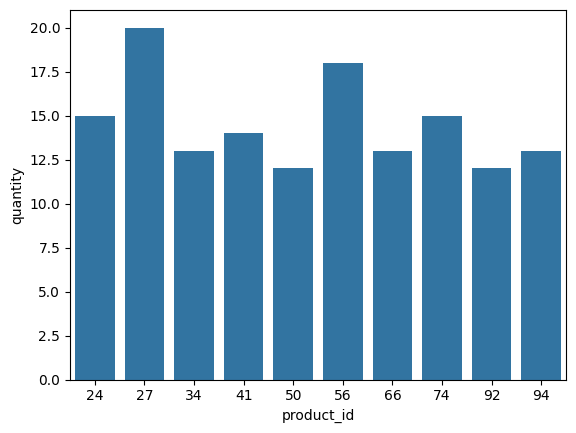

In [72]:
import seaborn as sns

sns.barplot(data=products_sells, x='product_id', y='quantity')

<Axes: xlabel='date', ylabel='quantity'>

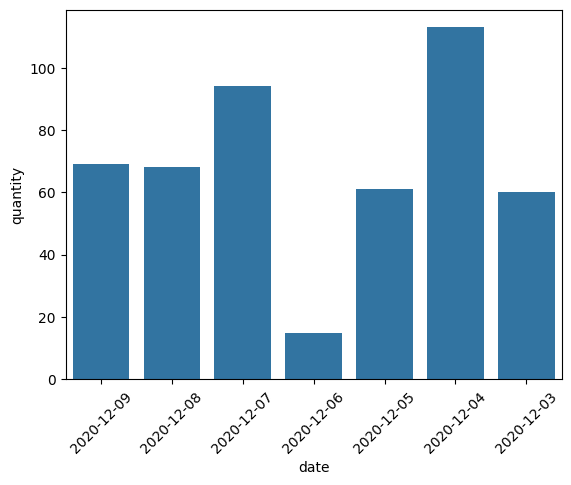

In [74]:
# 4
dates_sells = df.groupby('date', as_index=False) \
                .agg({'quantity':'sum'}) \
                .sort_values('date', ascending=False).head(10)

import matplotlib.pyplot as plt
plt.xticks(rotation=45)

sns.barplot(data=dates_sells, x='date', y='quantity')

In [81]:
# 5
df.groupby(['name', 'product_id']) \
  .agg({'date': pd.Series.nunique}) \
  .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
